<a href="https://colab.research.google.com/github/hollymangu/Machine-Learning-Assignment/blob/main/ML_Coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML - Coursework 1 Group Project**

Group number: 2

Student names and k-number:


*   Seyda Tatlicioglu - K2451397
*   Holly Mangu - K2121417
*   Kulanika Gnanaratna - K2443219
*   Ansar Ahmad - K2403224




In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 976.2 kB/s eta 0:00:00


## **Load modules**


In [2]:
# Import Appropriate Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,precision_recall_curve, average_precision_score

## **Load data**

In [3]:
# Load Digits Dataset [1][2]

digits = load_digits()

## **Training**

In [4]:
# X (features) and y (labels)

# Flatten data to 2D as (1797, 64)
X = digits.data
# Labels (0-9)
y = digits.target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize y_test (for multi-class Precision-Recall curves)
y_test_binarized = label_binarize(y_test, classes=digits.target_names)

print('Training set size :{shape}'.format(shape= X_train.shape))
print('Testing set size :{shape}'.format(shape= X_test.shape))


Training set size :(1437, 64)
Testing set size :(360, 64)


## **Classification**

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   Logistic Regression [3]

      - Logistic Regression with PCA

2.   Gradient Boosting [4][5]
3.   Decision Tree
4.   SVM
5.   Naive Bayes
6.   LDA [6][7]
7.   Random Forest
  - Random Forest with PCA
8.   KNN
  - KNN with PCA







**Logistic Regression**

In [5]:
# Logistic Regression (Without Dimensionality Reduction) [2][3]

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression(max_iter = 2500)

# Train the classifier
log_reg.fit(X_train, y_train)

# Make the prediction
y_pred_lr = log_reg.predict(X_test)

# Evaluate the logistic regression's accuracy (without dimensionalty reduction)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy (No Dimensionality Reduction): {acc_lr:.4f}")



Logistic Regression Accuracy (No Dimensionality Reduction): 0.9750


In [6]:
# Logistic Regression with PCA

# Reduce to 30 principal components
pca_lr = PCA(n_components= 30)
X_train_lr_pca = pca_lr.fit_transform(X_train)
X_test_lr_pca = pca_lr.transform(X_test)

log_reg_pca = LogisticRegression(max_iter=5000)

# Train the classifier
log_reg_pca.fit(X_train_lr_pca, y_train)

# Make the prediction
y_pred_lr_pca = log_reg_pca.predict(X_test_lr_pca)

# Evaluate the logistic regression's accuracy (with PCA)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print(f"Logistic Regression Accuracy (with PCA): {acc_lr_pca:.4f}")


Logistic Regression Accuracy (with PCA): 0.9722


In [7]:
# Hyperparameter Tuning using GridSearch for Logistic Regression Classifier [2]

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000,3000]}

# Initialize GridSearchCV with cross-validation
grid_search_lr = GridSearchCV( LogisticRegression(random_state=42), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform GridSearchCV on the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameter
print("Best Hyperparameters:", grid_search_lr.best_params_)

# Get the best model from the grid search
best_model_lr = grid_search_lr.best_estimator_

# Make predictions using the best model
y_pred_best_lr = best_model_lr.predict(X_test)

# Evaluate and print the model's accuracy
acc_best_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Logistic Regression (Best Hyperparameters) Accuracy: {acc_best_lr:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Best Hyperparameters) Accuracy: 0.9750


**Gradient Boosting Classifier [4][5]**

In [8]:
# Gradient Boosting Classifier [2]

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Train the classifier
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model's accuracy
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.4f}")

Gradient Boosting Accuracy: 0.9694


In [9]:
# Hyperparameter Tuning using GridSearch for Gradient Boosting [2]

# Define the parameter grid for hyperparameter tuning
param_grid_gb_optimized = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8]}

#Initialize GridSearchCV with cross-validation
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb_optimized, cv=5, scoring="accuracy", n_jobs=-1)

# Perform GridSearchCV on the training data
grid_search_gb.fit(X_train, y_train)

# Print the best parameter
print(f"Best Hyperparameters: {grid_search_gb.best_params_}")

# Get the best model from the grid search
best_gb = grid_search_gb.best_estimator_

# Make predictions using the best model
y_pred_best_gb= best_gb.predict(X_test)

# Evaluate and print best hyperparameter-tuned model's accuracy
acc_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f"Gradient Boosting (Best Hyperparameters) Accuracy: {acc_best_gb:.4f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting (Best Hyperparameters) Accuracy: 0.9778


**Decision Tree Classifier [8]**

In [10]:
# Decision Tree Classifier [2]

# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

Decision Tree Accuracy: 0.8417


In [11]:
# Decision Tree hyperparameter grid [2]
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameter
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model
best_dt = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_dt = best_dt.predict(X_test)

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8750


**SVM [9]**

In [12]:
#SVM Classifier [2]
svm_clf = svm.SVC(probability=True) # <- THIS ENABLES predict_proba()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

# predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")

SVM Accuracy: 0.9861


In [13]:
# SVM hyperparameter grid [2]
param_grid = {
    'C': [0.98, 0.99, 1.0, 1.01, 1.02],
    'gamma': [0.00095, 0.00098, 0.001, 0.00102]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1) # [1.a]
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Use the best model to predict on the test set
y_pred_best_svm = best_svm.predict(X_test)

# Calculate accuracy
acc_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Optimized SVM Score: {acc_svm:.4f}")

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Optimized SVM Score: 0.9889
Best Hyperparameters: {'C': 0.98, 'gamma': 0.00095}


**Naive Bayes Classifier [7][10]**

In [14]:
# Naive Bayes Classifier [2]

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes classifier Accuracy: {accuracy_nb:.4f}")

Naive Bayes classifier Accuracy: 0.8472


In [15]:
# Hyperparameter Tuning using GridSearch for Naive Bayes Classifier [2]

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameter and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_nb = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_nb = best_nb.predict(X_test)

# Evaluate the model's accuracy
accuracy_best_nb = accuracy_score(y_test, y_pred_best_nb)
print(f"Naive Bayes classifier (Best Hyperparameters)  Accuracy : {accuracy_best_nb:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'var_smoothing': 0.0001}
Naive Bayes classifier (Best Hyperparameters)  Accuracy : 0.8972


**LDA Classifier**

In [16]:
# LDA Classifier [2]

# Initialize LDA as a classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test data
y_pred_lda = lda.predict(X_test)

# Evaluate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Classifier Accuracy : {accuracy_lda:.4f}")

LDA Classifier Accuracy : 0.9444


In [17]:
# Hyper runing of parameters for LDA Classifier Using GridSearchCv [2]

# Define hyperparameter grid with constraints
param_grid = [
    {'solver': ['svd']},
    {'solver': ['lsqr'],'shrinkage': [None, 'auto'] + list(np.linspace(0, 1, 10))},]


# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    lda, param_grid=param_grid,
    cv=5, scoring='accuracy', n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get best model
best_lda = grid_search.best_estimator_

# Predict on test data
y_pred_best_lda = best_lda.predict(X_test)

# Evaluate performance
accuracy_best_lda = accuracy_score(y_test, y_pred_best_lda)
print(f"Best LDA Parameters: {grid_search.best_params_}")
print(f"LDA Classifier (Best Hyperparameters) Accuracy: {accuracy_best_lda:.4f}")

Best LDA Parameters: {'shrinkage': np.float64(0.3333333333333333), 'solver': 'lsqr'}
LDA Classifier (Best Hyperparameters) Accuracy: 0.9500


**Random Forest**

In [18]:
# Initialize the Random Forest classifier [2]
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

Accuracy for Random Forest: 0.9722


In [19]:
# Apply PCA to Random Forest for dimensionality reduction [2]
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the Random Forest classifier with PCA
rf.fit(X_train_pca, y_train)

# Make predictions
y_pred_rf_pca = rf.predict(X_test_pca)

# Calculate accuracy
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_rf_pca:.2f}")

Random Forest Accuracy with PCA: 0.61


In [20]:
# Hyperparameter Tuning using GridSearch for Random Forest [2]

# Define parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [None, 10, 20, 30]}

# Initialize GridSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='balanced_accuracy')

# Perform GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameter and best score
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Get the best model from the grid search
best_rf = grid_search_rf.best_estimator_

# Make predictions using the best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the model's accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Random Forest classifier (Best Hyperparameters) Accuracy: {accuracy_best_rf:.4f}")

Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
Random Forest classifier (Best Hyperparameters) Accuracy: 0.9722


**k-NN**


In [21]:
# Initialize k-NN classifier [2]
knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy without PCA: {accuracy_knn:.4f}")

k-NN Accuracy without PCA: 0.9833


In [22]:
# Apply PCA to k-NN for dimensionality reduction [2]
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the k-NN classifier with PCA
knn.fit(X_train_pca, y_train)

# Make predictions
y_pred_knn_pca = knn.predict(X_test_pca)

# Calculate accuracy
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f"k-NN Accuracy with PCA: {accuracy_knn_pca:.4f}")


k-NN Accuracy with PCA: 0.6000


In [23]:
# Hyperparameter Tuning using GridSearch for k-NN [2]

# Define parameter grid for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for KNN: {grid_search_knn.best_params_}")

# Get the best model from the grid search
best_knn = grid_search_knn.best_estimator_

# Make predictions using the best model
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the model's accuracy
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"KNN classifier (Best Hyperparameters) Accuracy: {accuracy_best_knn:.4f}")


Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN classifier (Best Hyperparameters) Accuracy: 0.9833


## **Evaluation**

**Balanced Accuracy Scores [11][12]**

In [24]:
# List of models with best accuracy and their corresponding predictions
models = {
    "Logistic Regression": y_pred_best_lr,
    "Gradient Boosting": y_pred_best_gb,
    "Naive Bayes" : y_pred_best_nb,
    "LDA" : y_pred_best_lda,
    "Decision Tree" : y_pred_best_dt,
    "SVM": y_pred_best_svm,
    "KNN":y_pred_best_knn,
    "Random Forest":y_pred_best_rf
}

# Loop through each model and compute balanced accuracy
for model_name, y_pred in models.items():
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy {model_name}: {balanced_acc:.4f}")

Balanced Accuracy Logistic Regression: 0.9769
Balanced Accuracy Gradient Boosting: 0.9786
Balanced Accuracy Naive Bayes: 0.8949
Balanced Accuracy LDA: 0.9470
Balanced Accuracy Decision Tree: 0.8719
Balanced Accuracy SVM: 0.9895
Balanced Accuracy KNN: 0.9841
Balanced Accuracy Random Forest: 0.9715


**Precision-recall curves[15]**

In [25]:
# Models
model_predictions = {
    "Logistic Regression": best_model_lr,
    "Gradient Boosting": best_gb,
    "Naive Bayes": best_nb,
    "LDA": best_lda,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "KNN": best_knn,
    "Random Forest": best_rf
}

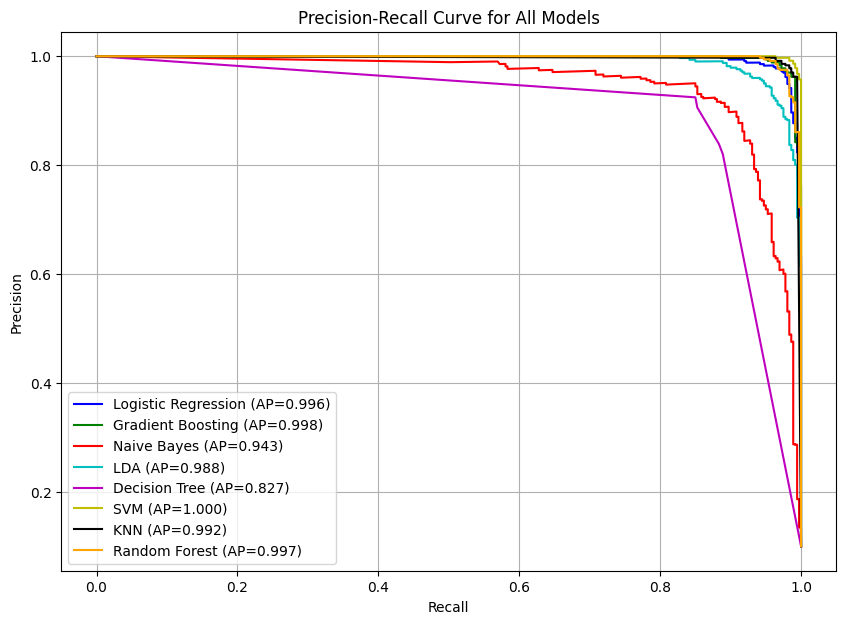

In [26]:
# Define a color map for different models
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# single figure created for all models
plt.figure(figsize=(10, 7))

for i, (model_name, model) in enumerate(model_predictions.items()):

    X_test_used = X_test

    #  predictions
    if hasattr(model, "predict_proba"):
        # Get probability estimates
        y_score = model.predict_proba(X_test_used)
    else:
        # Use decision function if no predict_proba()
        y_score = model.decision_function(X_test_used)

    # Compute Precision-Recall for macro-averaging
    precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
    average_precision = average_precision_score(y_test_binarized, y_score, average="macro")

    # Plot Precision-Recall curve for this model
    plt.plot(recall, precision, color=colors[i], label=f"{model_name} (AP={average_precision:.3f})")

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models")
plt.legend(loc="best")
plt.grid()

plt.show()

**Confusion Matrix**

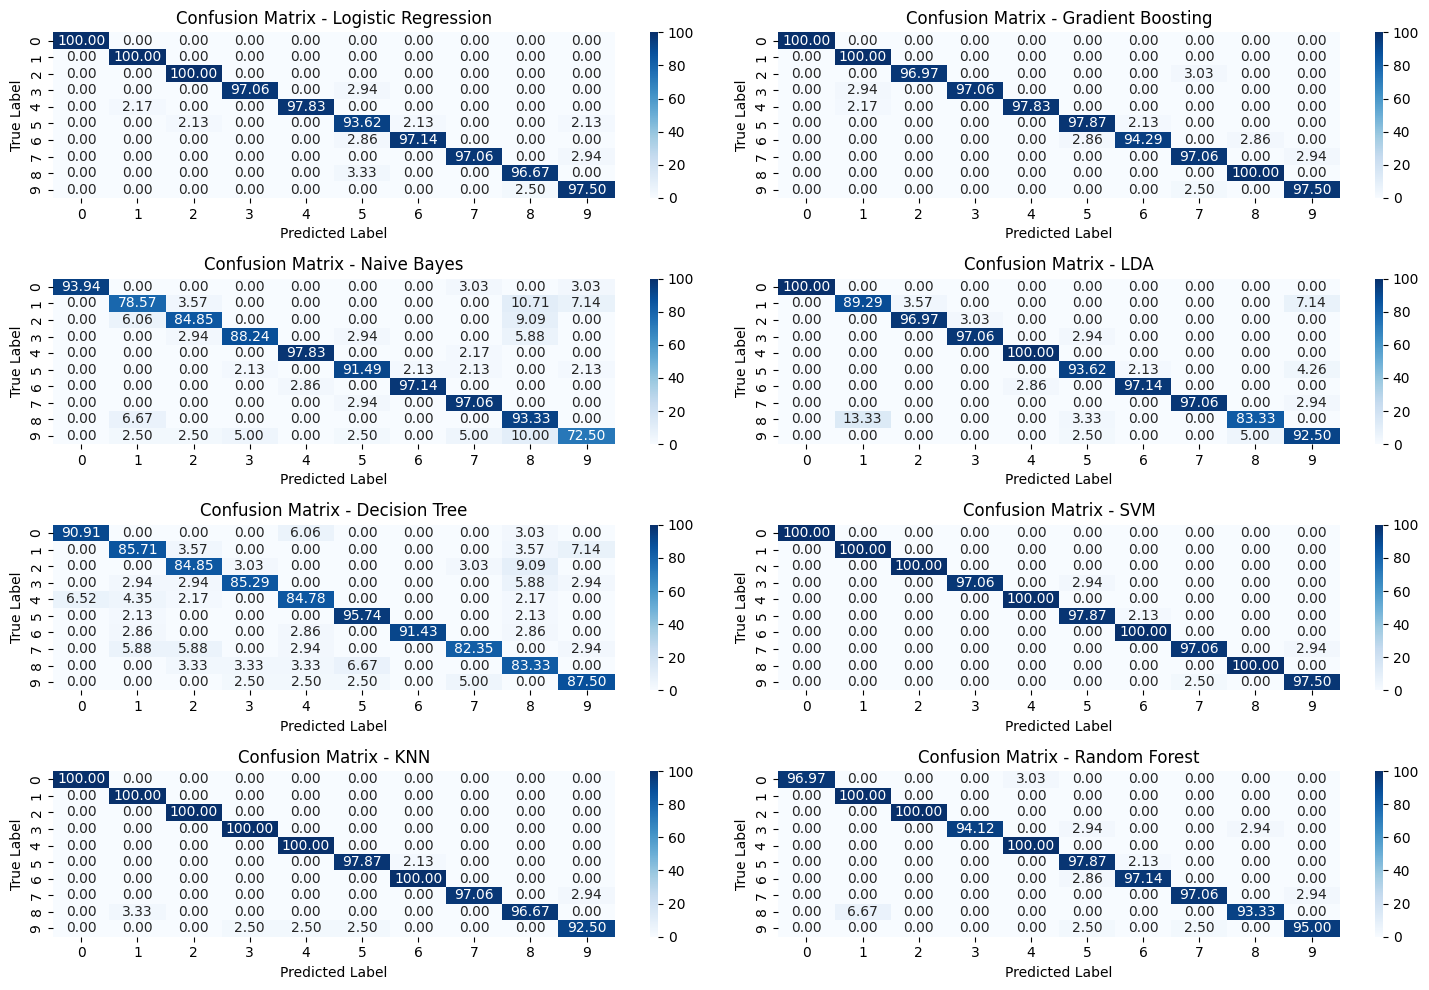

In [27]:
# Confusion Matrix for Best Chosen Classifier
model_predictions = {
    "Logistic Regression": y_pred_best_lr,
    "Gradient Boosting": y_pred_best_gb,
    "Naive Bayes" : y_pred_best_nb,
    "LDA" : y_pred_best_lda,
    "Decision Tree" : y_pred_best_dt,
    "SVM": y_pred_best_svm,
    "KNN":y_pred_best_knn,
    "Random Forest":y_pred_best_rf}

# Set up a 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# Iterate through models and plot each confusion matrix
for ax, (model_name, y_pred) in zip(axes.flat, model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names, vmin=0, vmax=100, ax=ax)

    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

**ROC AUC Score (using the macro-averaged approach)[16]**

In [28]:
# Get predicted probabilities for each best model
y_prob_best_lr = best_model_lr.predict_proba(X_test)
y_prob_best_gb = best_gb.predict_proba(X_test)
y_prob_best_nb = best_nb.predict_proba(X_test)
y_prob_best_lda = best_lda.predict_proba(X_test)
y_prob_best_dt = best_dt.predict_proba(X_test)
y_prob_best_svm = best_svm.predict_proba(X_test)
y_prob_best_knn = best_knn.predict_proba(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)


# Convert y_test to a binary format (One-vs-Rest) for ROC AUC Score and Curve
n_classes = len(digits.target_names)
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))


In [29]:
# Define model with best accuracy and their corresponding probability predictions
models = {
    "Logistic Regression (Best Hyperparameters)": y_prob_best_lr,
    "Gradient Boosting (Best Hyperparameters)": y_prob_best_gb,
    "Naive Bayes (Best Hyperparameters)": y_prob_best_nb,
    "LDA (Best Hyperparameters)": y_prob_best_lda,
    "Decision Tree (Best Hyperparameters)": y_prob_best_dt,
    "SVM (Best Hyperparameters)": y_prob_best_svm,
    "KNN (Best Hyperparameters)": y_prob_best_knn,
    "Random Forest (Best Hyperparameters)" : y_prob_best_rf}

# Compute and print macro-averaged ROC AUC for each model
for model_name, y_prob in models.items():
    roc_auc = roc_auc_score(y_test_binarized, y_prob, average="macro") #[1.b] [1.c]
    print(f"Macro-Averaged ROC AUC for {model_name}: {roc_auc:.4f}")


Macro-Averaged ROC AUC for Logistic Regression (Best Hyperparameters): 0.9995
Macro-Averaged ROC AUC for Gradient Boosting (Best Hyperparameters): 0.9997
Macro-Averaged ROC AUC for Naive Bayes (Best Hyperparameters): 0.9901
Macro-Averaged ROC AUC for LDA (Best Hyperparameters): 0.9985
Macro-Averaged ROC AUC for Decision Tree (Best Hyperparameters): 0.9378
Macro-Averaged ROC AUC for SVM (Best Hyperparameters): 0.9999
Macro-Averaged ROC AUC for KNN (Best Hyperparameters): 0.9970
Macro-Averaged ROC AUC for Random Forest (Best Hyperparameters): 0.9996


**ROC Curves for Best Models**

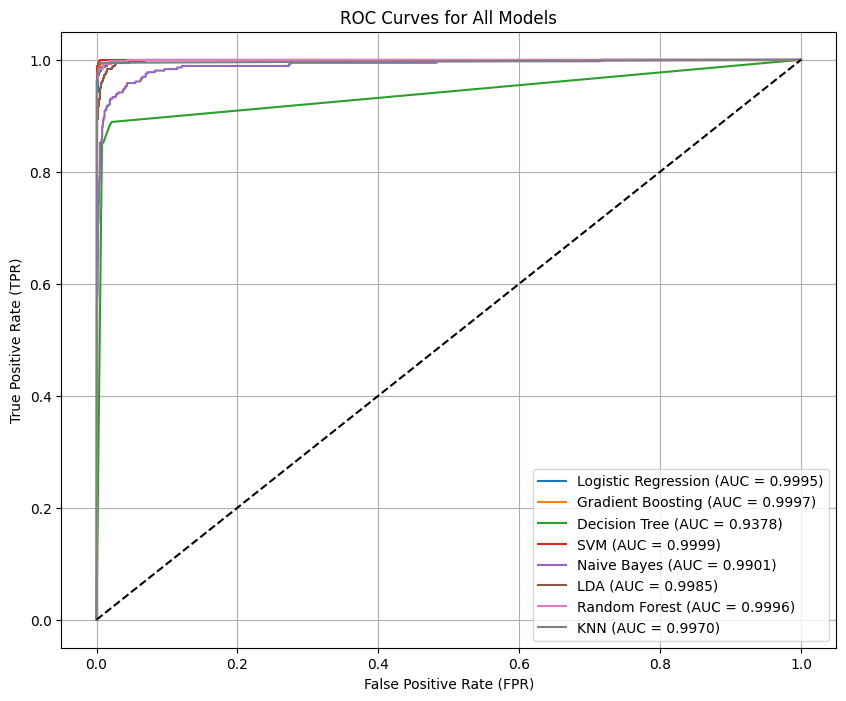

In [30]:
# Define models with best accuracy
models = {
    "Logistic Regression": best_model_lr,
    "Gradient Boosting": best_gb,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "Naive Bayes": best_nb,
    "LDA": best_lda,
    "Random Forest": best_rf,
    "KNN": best_knn}

plt.figure(figsize=(10, 8))

# Loop through each model and compute ROC curve
for name, model in models.items():
    # Get probability scores
    y_score = model.predict_proba(X_test)
    # Compute macro-averaged ROC AUC
    roc_auc = roc_auc_score(y_test_binarized, y_score, average="macro")
     # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())

    # Plot each model's curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

# Plot baseline (random guess)
plt.plot([0, 1], [0, 1], "k--")

# Customize plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()



## **References**

[1]Alpaydin, E. & Kaynak, C. (1998). Optical Recognition of Handwritten Digits [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C50P49.

[2] Scikit-learn developers, “Supervised learning,” Scikit-learn: Machine Learning in Python, Feb. 2025. [Online]. Available: https://scikit-learn.org/stable/supervised_learning.html. [Accessed: Feb 15, 2025].

[3] Schütze, H., Hull, D.A. and Pedersen, J. (1995) A comparison of classifiers and document representations for the routing problem. SIGIR-95, ACM.

[4] D. Nelson, "Gradient Boosting Classifiers in Python with Scikit-Learn." Stack Abuse. Available: https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/. Accessed: Feb. 15, 2025.

[5] J. H. Friedman, "Greedy function approximation: A gradient boosting machine," IMS 1999 Reitz Lecture, Feb. 24, 1999, modified Mar. 15, 2000, Apr. 19, 2001. Available: https://jerryfriedman.su.domains/ftp/trebst.pdf

[6] R. A. Fisher, “The Use Of Multiple Measurements In Taxonomic Problems,” Annals of Eugenics, vol. 7, no. 2, pp. 179–188, Sep. 1936, doi: 10.1111/j.1469-1809.1936.tb02137.x.

[7] R. O. Duda and P. E. Hart, Pattern classification and scene analysis. 1973. [Online]. Available: http://ci.nii.ac.jp/ncid/BA03199410

[8] Quinlan, J.R. (1986). Induction of decision trees. Machine Learning, [online] 1(1), pp.81–106. doi:https://doi.org/10.1007/bf00116251.

[9] Cortes, C., Vapnik, V. Support-vector networks. Mach Learn 20, 273–297 (1995). https://doi.org/10.1007/BF00994018

[10] M. E. Maron, “Automatic Indexing: an experimental inquiry,” Journal of the ACM, vol. 8, no. 3, pp. 404–417, Jul. 1961, doi: 10.1145/321075.321084.

[12] C. M. C. da Silva, "A Data Scientist’s Guide to Balanced Accuracy," Train in Data, Sep. 18, 2024. Available: https://www.blog.trainindata.com/a-data-scientists-guide-to-balanced-accuracy/

[13] Brodersen, K.H.; Ong, C.S.; Stephan, K.E.; Buhmann, J.M. (2010). The balanced accuracy and its posterior distribution. Proceedings of the 20th International Conference on Pattern Recognition, 3121-24.

[14] John. D. Kelleher, Brian Mac Namee, Aoife D’Arcy, (2015). Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies.

[15] Scikit-Learn (2019) Precision-Recall — scikit-learn 0.21.3 documentation, Scikit-learn.org. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html.

[16] Scikit-learn Developers, "Receiver Operating Characteristic (ROC)". Available: https://scikit-learn.org/0.15/auto_examples/plot_roc.html